# <b>Logistic regression from scratch in Python</b>

This notebook focuses on implementing <b>Logistic Regression (LR)</b> from scratch.
Although there are many frameworks that allow implementing linear regression algorithm in a few lines of code, implementing the algorithm from scratch helps one to better understand its inner workings.

For a tutorial on <b>Linear</b> regression from scratch in python, please see this <a href="https://github.com/preguza/linear_regression_from_scratch_in_python"> notebook</a>.

The objective of this notebook is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. 

This is a standard supervised classification task:
- <b>Supervised</b> - the training data is `labeled` i.e. the algorithm knows the selling price of the houses included in the training data;
- <b>Classification</b> - the algorithm will predict a discrete label.

In [44]:
# IMPORTS

# Pandas is a wide used library for data manipulations.
import pandas as pd    

# Used for spliting the dataset
from sklearn.model_selection import train_test_split 

# Used for scaling inputs
from sklearn.preprocessing import MinMaxScaler

# Used for calculating accuracy 
from sklearn.metrics import accuracy_score

# Great library for linear algebra operations
import numpy as np             

# Suppres scientific notation in numpy
np.set_printoptions(suppress=True)     

# Library used for data visualization
import matplotlib.pyplot as plt

# <b>Dataset</b>

The training dataset consists of:
- Input variables, also called <b>features</b>:
>- Glucose  - Plasma glucose concentration a 2 hours in an oral glucose tolerance test;
>- BMI - Body mass index (weight in kg/(height in m)^2);
>- Age - Age (years);
- Labels: 
>- Outcome - Class variable (0 or 1) indicating wether or not a patient has diabetes.

In [45]:
# Read the dataset from the file
dataset = pd.read_csv("./Data/diabetes_small.csv")

In [46]:
# View top 5 rows of the dataset
dataset.head()

,Glucose,BMI,Age,Outcome
0,148,33.6,50,1
1,85,26.6,31,0
2,183,23.3,32,1
3,89,28.1,21,0
4,137,43.1,33,1


In [47]:
# Veiw number of rows and columns
dataset.shape

(500, 4)

We split the data in features and labels

In [48]:
X = dataset.drop("Outcome", axis=1)
X.head()

,Glucose,BMI,Age
0,148,33.6,50
1,85,26.6,31
2,183,23.3,32
3,89,28.1,21
4,137,43.1,33


In [49]:
Y = dataset.Outcome
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

<b><u>Input scaling</u></b>:

In [50]:
feature_scaler = MinMaxScaler()
feature_scaler.fit(X)
X = feature_scaler.transform(X)

In [51]:
label_scaler = MinMaxScaler()
label_scaler.fit(Y.to_numpy().reshape(-1,1))
Y = label_scaler.transform(Y.to_numpy().reshape(-1,1))

<b><u>Train/test split</u></b>:

We split data in training data and test data. 

We need test data because we want to check how the algorithm performs on previously unseen data.

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [53]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((400, 3), (100, 3), (400, 1), (100, 1))

# <b> Theory

First, we have to decide how we are going to represent the hypothesis function used to predict Y (i.e. whether a patient has diabetes).

For the purpose of this notebook we will use the following function:

$ h_{\theta}(x) = g( \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \theta_{3}x_{3}) $;
<br> 
- where $x_{i}$ represent the features:
>- $x_{1}$ - Glucose
>- $x_{2}$ - BMI
>- $x_{3}$ - Age
- $\theta_{i}$`s represent the <b>parameters</b> (also called <b>weights</b>) parameterizing the
space of linear functions mapping from $X$ to $Y$.
- $g(z)$ - is caleed the logistic function, sometimes also refered as sigmoid function.
>- $g(z) = \frac {1}{1+e^{-z}}$


To simplify the  notation, we introduce the convention of letting $x_0$ = 1:

$ h(x) =g( \sum\limits _{j=1} ^{p}{\theta_{i}x_{i}} )= g(\theta^{T}x$)

In [54]:
# Add a column x_0 = 1
x_train = np.append(np.ones((400,1)), x_train, axis=1)
x_test = np.append(np.ones((100,1)), x_test, axis=1)

Equation for updating parameters $\theta$ is the same as in Linear Regression, the difference being that $h_{\theta}(x)$ has a diferent formula:

$\theta_{j}:=\theta_{j} + \alpha(y^{(i)} - h(x^{(i)}))x_{j}^{(i)}$ (for every $j$)

$\alpha$ is called <b>learning rate</b> and allows us to configure how significant are the changes applied to $\theta$.

# <b> Code </b>

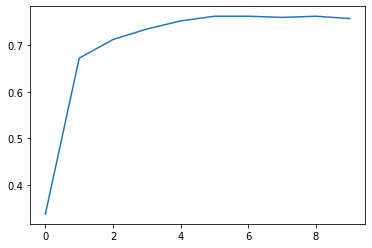

In [75]:
# Initalize theta with zeros
theta = np.random.randn(4)

# Hyperparameters
alpha = 0.16             # Learning rate
epochs = 10              # Number of epochs

def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

def h(x, theta):
    return sigmoid(x@theta)

# Variables used for visualizing cost
all_costs = []

for _ in range(epochs):
    
    all_costs.append(accuracy_score(y_train, h(x_train, theta).round()))

    for i in range(len(x_train)):
        x = x_train[i]
        y = y_train[i]
        h_x = h(x, theta)
        theta = theta + alpha * (y - h_x)*x            
    
    
    # Decrease learning rate as training progresses to help the algorithm to converge
    if _ %4 == 0 : 
        alpha = alpha/2
        
    
plt.plot(all_costs)

# <b> Epilogue</b>

In [76]:
print("Accuracy on test data, (i.e. previously unseen data): ",accuracy_score(y_test, h(x_test, theta).round()),"%" )

Accuracy on test data, (i.e. previously unseen data):  0.77 %


As we have seen in this notebook, we were able to write from scratch an classification algorithm which helped us, using only 3 features, to identify wether somenone has diabetes with an accuracy 77% on the test data.

Thats all for this notebook. For an indepth introduction to <b>Machine Learning</b> and specifically <b>LR</b>  please see Andrew NG\`s`lecture (<a href="https://www.youtube.com/watch?v=het9HFqo1TQ&list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU&index=3">video</a>) and its notes (<a href="https://cs229.stanford.edu/notes2021fall/cs229-notes1.pdf">.pdf</a>).